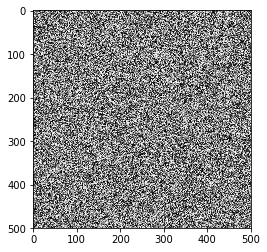

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import io
from PIL import Image
from matplotlib.pyplot import imshow
import pandas as pd
from bresenham import bresenham
import matplotlib.pyplot as plt
import random



random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray', interpolation='nearest');


In [20]:
import os
filename = 'rsz_test_img.png'
from skimage import io
test = io.imread(filename)


C:\Users\Toshiki\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


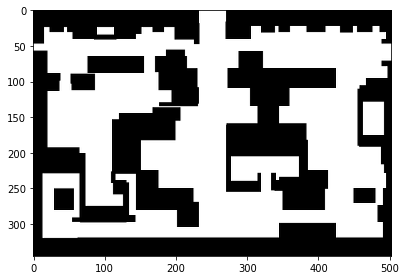

In [21]:
io.imshow(test)

In [22]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import os
from skimage import io

def show_image(filename):
    """Takes image file and shows (and resizes) it"""
    %matplotlib inline
    img = Image.open(filename)
    #img = img.resize((500, 350))
    #imshow(np.asarray(img))
    #img.show()
    test = io.imread(filename)
    io.imshow(test)
    

C:\Users\Toshiki\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


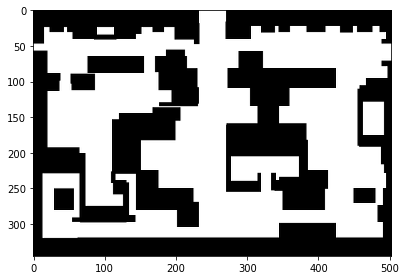

In [23]:
#convert an image to a smaller one
show_image("rsz_test_img.png")

In [24]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import pandas as pd

#create a function that takes an image file and returns a dataframe
def imager(filename):
    """takes in a black&white image filename and returns a dataframe object"""
    img = Image.open(filename)
    arr = np.array(img)
    
    cols = len(arr) 
    rows = len(arr[0]) 
    w, h = rows, cols;
    Matrix = [[None for x in range(rows)] for y in range(cols)] 
    valid_coords = [] #Holds all pixels that are white


    for i in range(cols):
        for j in range(rows):
            if list(arr[i][j]) == [0, 255]:
                Matrix[i][j] = "B"
            else:
                Matrix[i][j] = "W"
                valid_coords.append((i, j))
            
    data = pd.DataFrame(data = Matrix)
    return data, valid_coords

In [25]:
m, valid_coords = imager("rsz_test_img.png")

In [26]:
max_scan_range = 250

In [27]:
print(len(arr))
print(len(arr[0]))
print(list(arr[0][0]))
print(range(len(arr)))
print([i for i in range(5)])
print(arr[0])

NameError: name 'arr' is not defined

In [81]:
Matrix = m.values
print(len(Matrix))
print(len(Matrix[0]))

345*503

345
503


173535

In [29]:
from math import *

def find_ends(position, n, rng):
    
    """Calculates the outermost point of a scan at an angle relative to the particle"""
    x = position[1] + rng * (cos(radians(position[2] + n)))
    y = position[0] + rng * (sin(radians(position[2] + n)))
    
    #Remember, because y is defined first in the image
    return (int(round(y)), int(round(x)), position[2])
    
    

In [82]:
class Particle:
    """Represents a particle for the particle filter in a 2-D State Space
    NOTE: Because the image processing is indexed by the Y-axis first, this is 
    reflected in the particle's pose representation."""
        
    def __init__(self, y, x, z):
        self.y = y      #particle's 'y-coordinate'
        self.x = x      #particle's 'x-coordinate'
        self.z = z      #particle's angle
        self.weight = 1/173535 #particle's weight has to be small to not break sampling
    
    #Define getters & setters
    def get_coords(self):
        return (self.y, self.x, self.z)
    
    def get_x(self):
        return self.x
    
    def get_y(self):
        return self.y
    
    def get_z(self):
        return self.z
    
    def set_coords(self, y, x, z):
        self.y = y
        self.x = x
        self.z = z
  
    def set_x(self, x):
        self.x = x
        
    def set_y(self, y):
        self.y = y
    
    def set_z(self, z):
        self.z = z
        
    def set_weight(self, weight):
        self.weight = weight
        
    def get_weight(self):
        return self.weight
    
    #Controls for turning/moving the robot by l pixels
    def move_forward(self, l):
        xmove = int(round(self.get_x() + cos(self.get_z()) * l))
        ymove = int(round(self.get_y() + sin(self.get_z()) * l))
        path = list(bresenham(self.get_y(), self.get_x(), ymove, xmove))
        #If the robot bumps into a wall, then it just stays there.
        count = 0 #If no black pixels are encountered, then count will be the max length of the scan
        #Also, it must stop iterating if it encounters a point that is out of bounds of the map
        while count != len(path) - 1 and path[count][0] > 0 and path[count][1] > 0 and path[count][0] < len(Matrix) and path[count][1] < len(Matrix[0]) and Matrix[path[count][0]][path[count][1]] != "B" :
            count += 1
        edge_point = path[count] 
        self.set_x(edge_point[1])
        self.set_y(edge_point[0])
        
    #rotate the robot
    def rotate(self, angle):
        self.set_z((self.get_z() + angle) % 360)

In [31]:
#test move forward
ass = Particle(50, 2, 0)
ass.move_forward(100)
print((ass.get_x(), ass.get_y()))


(102, 50)


In [32]:
#test rotate
print(ass.get_z())
ass.rotate(350)
print(ass.get_z())

0
350


In [33]:
p = Particle(50, 2, 0)
p.get_coords()

(50, 2, 0)

In [35]:
ranges = range(0, 360, 1)

for i in ranges:
    print(find_ends(p.get_coords(), i, 100))


(50, 102, 0)
(52, 102, 0)
(53, 102, 0)
(55, 102, 0)
(57, 102, 0)
(59, 102, 0)
(60, 101, 0)
(62, 101, 0)
(64, 101, 0)
(66, 101, 0)
(67, 100, 0)
(69, 100, 0)
(71, 100, 0)
(72, 99, 0)
(74, 99, 0)
(76, 99, 0)
(78, 98, 0)
(79, 98, 0)
(81, 97, 0)
(83, 97, 0)
(84, 96, 0)
(86, 95, 0)
(87, 95, 0)
(89, 94, 0)
(91, 93, 0)
(92, 93, 0)
(94, 92, 0)
(95, 91, 0)
(97, 90, 0)
(98, 89, 0)
(100, 89, 0)
(102, 88, 0)
(103, 87, 0)
(104, 86, 0)
(106, 85, 0)
(107, 84, 0)
(109, 83, 0)
(110, 82, 0)
(112, 81, 0)
(113, 80, 0)
(114, 79, 0)
(116, 77, 0)
(117, 76, 0)
(118, 75, 0)
(119, 74, 0)
(121, 73, 0)
(122, 71, 0)
(123, 70, 0)
(124, 69, 0)
(125, 68, 0)
(127, 66, 0)
(128, 65, 0)
(129, 64, 0)
(130, 62, 0)
(131, 61, 0)
(132, 59, 0)
(133, 58, 0)
(134, 56, 0)
(135, 55, 0)
(136, 54, 0)
(137, 52, 0)
(137, 50, 0)
(138, 49, 0)
(139, 47, 0)
(140, 46, 0)
(141, 44, 0)
(141, 43, 0)
(142, 41, 0)
(143, 39, 0)
(143, 38, 0)
(144, 36, 0)
(145, 35, 0)
(145, 33, 0)
(146, 31, 0)
(146, 30, 0)
(147, 28, 0)
(147, 26, 0)
(147, 24, 0)
(14

In [36]:
"""Now use the bresenham algorithm to find all pixels to examine for each line"""

from bresenham import bresenham

coords = p.get_coords()
ranges = find_ends(coords, 0, 100)

list(bresenham(coords[0], coords[1], ranges[0], ranges[1]))
#NOTE: bresenham returns tuples in the form of (y, x) NOT (x, y)

[(50, 2),
 (50, 3),
 (50, 4),
 (50, 5),
 (50, 6),
 (50, 7),
 (50, 8),
 (50, 9),
 (50, 10),
 (50, 11),
 (50, 12),
 (50, 13),
 (50, 14),
 (50, 15),
 (50, 16),
 (50, 17),
 (50, 18),
 (50, 19),
 (50, 20),
 (50, 21),
 (50, 22),
 (50, 23),
 (50, 24),
 (50, 25),
 (50, 26),
 (50, 27),
 (50, 28),
 (50, 29),
 (50, 30),
 (50, 31),
 (50, 32),
 (50, 33),
 (50, 34),
 (50, 35),
 (50, 36),
 (50, 37),
 (50, 38),
 (50, 39),
 (50, 40),
 (50, 41),
 (50, 42),
 (50, 43),
 (50, 44),
 (50, 45),
 (50, 46),
 (50, 47),
 (50, 48),
 (50, 49),
 (50, 50),
 (50, 51),
 (50, 52),
 (50, 53),
 (50, 54),
 (50, 55),
 (50, 56),
 (50, 57),
 (50, 58),
 (50, 59),
 (50, 60),
 (50, 61),
 (50, 62),
 (50, 63),
 (50, 64),
 (50, 65),
 (50, 66),
 (50, 67),
 (50, 68),
 (50, 69),
 (50, 70),
 (50, 71),
 (50, 72),
 (50, 73),
 (50, 74),
 (50, 75),
 (50, 76),
 (50, 77),
 (50, 78),
 (50, 79),
 (50, 80),
 (50, 81),
 (50, 82),
 (50, 83),
 (50, 84),
 (50, 85),
 (50, 86),
 (50, 87),
 (50, 88),
 (50, 89),
 (50, 90),
 (50, 91),
 (50, 92),
 (50, 9

In [39]:
def rayscan(point, max_scan_range):
    """Takes a particle as input and performs a rayscan at n degree increments
    , then returns the distances as an array"""
    #Convert the particle's pose into a 3-element tuple
    coords = point.get_coords()
    
    angles = range(0, 360, 1)
    scan_points = []
    results = [] #Stores the distances from the particle to edge of the scan
    #maximum range of the scanner in pixels
    scan_max_range = max_scan_range
    
    #find the furthest points of the scan for each angle
    for i in range(len(angles)):
        scan_points.append(find_ends(coords, angles[i], scan_max_range))
        
    #Apply the Bresenham algorithm to find all pixels along each scanning line
    for p in scan_points:
        #contains sequence of pixels from position of particle to extent of scanner
        path = list(bresenham(coords[0], coords[1], p[0], p[1]))            
        #Iterate over each pixel until a black one is encountered, or all pixels are white
        count = 0 #If no black pixels are encountered, then count will be the max length of the scan
        #Also, it must stop iterating if it encounters a point that is out of bounds of the map
        while count != len(path) - 1 and path[count][0] > 0 and path[count][1] > 0 and path[count][0] < len(Matrix) and path[count][1] < len(Matrix[0]) and Matrix[path[count][0]][path[count][1]] != "B":
            count += 1
        edge_point = path[count]   
        #print(path)
        #print(edge_point, count)
        results.append(getdist(coords, edge_point))         
    
    return results
    
    

In [42]:
from math import *
def getdist(point1, point2):
    """Calculates and returns distance between two pixels"""
    return sqrt(((point2[0] - point1[0])**2) + ((point2[1] - point1[1])**2))

In [43]:
pa = Particle(50, 2, 0)
angles = range(0, 360, 1)
scans = []
for i in range(len(angles)):
    scans.append(find_ends(pa.get_coords(), angles[i], 200))
for p in scans:
    path = list(bresenham(coords[0], coords[1], p[0], p[1]))
    count = 0 #If no black pixels are encountered, then count will be the max length of the scan
        #Also, it must stop iterating if it encounters a point that is out of bounds of the map
    while count != len(path) - 1 and path[count][0] > 0 and path[count][1] > 0 and path[count][0] < len(Matrix) and path[count][1] < len(Matrix[0]) and Matrix[path[count][0]][path[count][1]] != "B":
            count += 1
    getdist(pa.get_coords(), p)

In [44]:
Matrix[100][10]

'B'

In [89]:
import numpy as np
#Take random samples from list of weighted particles

def generate_samples(particles, n=1000):
    """Generate n number of particles randomly distributed across map"""
    #extract weight of each particle
    weights = []
    for point in particles:
        weights.append(point.get_weight())
    #Normalize weights
    probs = np.array(weights)
    probs /= probs.sum()
    
    #resample based on weights
    before_noise = list(np.random.choice(particles, n, p=probs, replace=True))
        
    return before_noise
        
        
    

In [68]:
def init_particles(coords):
    """Takes coordinates of white spaces on map and converts to particles with random angle"""
    particles = []
    for coord in coords:
        particles.append(Particle(coord[0], coord[1], np.random.randint(low = 0, high = 360)))
    return particles

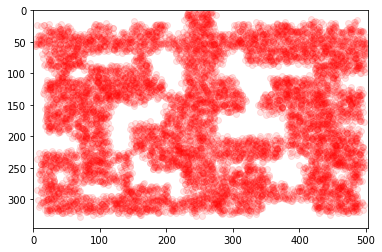

In [90]:
import matplotlib.pyplot as plt


parts = init_particles(valid_coords)
samples = generate_samples(parts, 10000)
#separate x and y coordinates in list of samples
x = []
y = []
for sample in samples:
    x.append(sample.get_x())
    y.append(sample.get_y())

#plt.plot(x, y, 'ro')
plt.scatter(x=x, y=y, c='r', alpha=0.1)
#plt.gca().invert_yaxis()
plt.axis([0, len(Matrix[0]), len(Matrix), 0])
plt.show()

In [91]:

#create a fxn that assigns a score to a particle based on a reference
def new_weight(reference, measurement, max_scan_range = 100):
    """Takes in the robot and particle object, and compares the scans to give it a score"""
    #Get scans of both
    a = rayscan(reference, max_scan_range)
    b = rayscan(measurement, max_scan_range)
    
    return sum([gauss_prob(a[i], b[i]) for i in range(len(a))])



In [92]:
#Helper function for assigning weights to particles
def gauss_prob(a, b):
    """Gaussian probability"""
    diff = b - a
    exp = -(diff**2)/0.5
    return (1./(sqrt(2*pi)*0.5)) * e**exp

In [93]:
def plot_particles(p):
    """takes a list of particles and plots a scatterplot"""
    x = []
    y = []
    for sample in p:
        x.append(sample.get_x())
        y.append(sample.get_y())

    #plt.plot(x, y, 'ro')
    plt.scatter(x=x, y=y, c='r', alpha=0.3)
    #plt.gca().invert_yaxis()
    plt.axis([0, len(Matrix[0]), len(Matrix), 0])
    plt.show()

In [94]:
new_weight(Particle(300,175, 0), Particle(300, 175, 0))

287.2384418890301

In [106]:
#base algorithm for the MCL 
#first, pass in a list of particles and the robot particle.
#Next, compare the particles scans with the robot scan to assign new weights
#resample from the list of particles with the new weights and return it
def MCL(particles, robot, num):
    """resample from the list of particles with the new weights and return it"""
    #update the weights for each particle
    for particle in particles:
        particle.set_weight(particle.get_weight() * new_weight(robot, particle))

    #resampling step
    
    before_noise = generate_samples(particles, n=num)
    
    #apply noise to samples
    after_noise = list()
    
    for particle in before_noise:
        x = int(round(particle.get_x() + np.random.normal(0, 3)))
        y = int(round(particle.get_y() + np.random.normal(0, 3)))
        z = int(round(particle.get_z() + np.random.normal(0, 5)))
        new_part = Particle(y, x, z)
        new_part.set_weight(new_part.get_weight() * new_weight(robot, new_part))
        after_noise.append(new_part)
    #apply noise to particles
    return after_noise


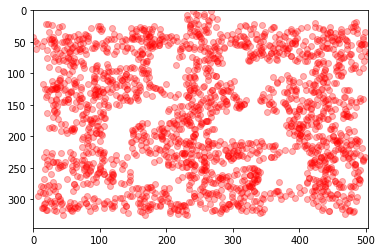

(76, 400, 59) 5.762526291526205e-06
(208, 281, 20) 5.762526291526205e-06
(312, 167, 117) 5.762526291526205e-06
(155, 383, 12) 5.762526291526205e-06
(102, 105, 232) 5.762526291526205e-06
(141, 427, 138) 5.762526291526205e-06
(171, 80, 266) 5.762526291526205e-06
(315, 464, 75) 5.762526291526205e-06
(293, 371, 326) 5.762526291526205e-06
(302, 334, 11) 5.762526291526205e-06
(138, 343, 68) 5.762526291526205e-06
(59, 379, 224) 5.762526291526205e-06
(205, 486, 209) 5.762526291526205e-06
(253, 59, 114) 5.762526291526205e-06
(211, 486, 141) 5.762526291526205e-06
(93, 38, 319) 5.762526291526205e-06
(250, 37, 357) 5.762526291526205e-06
(320, 481, 185) 5.762526291526205e-06
(16, 244, 26) 5.762526291526205e-06
(286, 419, 115) 5.762526291526205e-06
(211, 81, 229) 5.762526291526205e-06
(317, 434, 24) 5.762526291526205e-06
(150, 306, 232) 5.762526291526205e-06
(35, 499, 136) 5.762526291526205e-06
(28, 147, 9) 5.762526291526205e-06
(305, 472, 285) 5.762526291526205e-06
(49, 52, 76) 5.762526291526205e-0

(169, 430, 118) 5.762526291526205e-06
(130, 377, 100) 5.762526291526205e-06
(55, 493, 133) 5.762526291526205e-06
(217, 199, 162) 5.762526291526205e-06
(134, 234, 76) 5.762526291526205e-06
(268, 337, 220) 5.762526291526205e-06
(136, 449, 173) 5.762526291526205e-06
(157, 204, 143) 5.762526291526205e-06
(145, 46, 123) 5.762526291526205e-06
(52, 490, 77) 5.762526291526205e-06
(222, 198, 44) 5.762526291526205e-06
(71, 268, 81) 5.762526291526205e-06
(297, 449, 24) 5.762526291526205e-06
(197, 166, 131) 5.762526291526205e-06
(48, 50, 157) 5.762526291526205e-06
(288, 432, 299) 5.762526291526205e-06
(138, 266, 69) 5.762526291526205e-06
(288, 274, 157) 5.762526291526205e-06
(228, 197, 308) 5.762526291526205e-06
(276, 183, 23) 5.762526291526205e-06
(233, 202, 168) 5.762526291526205e-06
(81, 497, 74) 5.762526291526205e-06
(308, 175, 300) 5.762526291526205e-06
(125, 20, 160) 5.762526291526205e-06
(159, 365, 27) 5.762526291526205e-06
(195, 384, 314) 5.762526291526205e-06
(48, 162, 312) 5.762526291526

In [120]:
parts = init_particles(valid_coords)
samples = generate_samples(parts, 2000)
plot_particles(samples)


# To sort the list in place...
samples.sort(key=lambda x: x.weight, reverse=True)

for i in samples:
    print(i.get_coords(), i.get_weight())

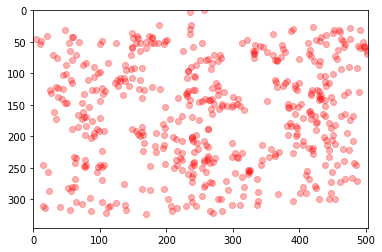

In [121]:
robot = Particle(150, 25, 0)
stuff = MCL(samples, robot, 500)
plot_particles(stuff)

In [122]:
robot.get_coords()

(150, 25, 0)

In [123]:
# To sort the list in place...
stuff.sort(key=lambda x: x.weight, reverse=True)

for i in stuff:
    print(i.get_coords(), i.get_weight())

(87, 429, 357) 0.0003924221994982889
(228, 363, 264) 0.000352694024144082
(90, 475, 263) 0.00033509998768483143
(59, 497, 194) 0.0002886732180285669
(192, 155, 348) 0.00027558798824917416
(137, 448, 186) 0.00021039955092151124
(295, 315, 177) 0.00020828967181837986
(303, 337, 222) 0.00020117043990985133
(222, 444, 273) 0.00019141081275257966
(255, 324, 2) 0.00019053226270081123
(245, 216, 306) 0.00018197225242700993
(135, 467, 9) 0.00017842103892613988
(153, 298, 252) 0.0001771716081028353
(241, 256, 270) 0.00017571754209111103
(309, 336, 213) 0.0001696245707928959
(210, 166, 355) 0.00016853660803583235
(149, 272, 264) 0.0001679692593934004
(255, 412, 25) 0.00016055975002501462
(123, 38, 15) 0.00016004652585938022
(311, 229, 311) 0.00015941233516592585
(198, 78, 255) 0.00015765879779475842
(53, 469, 141) 0.0001546956636842493
(57, 497, 215) 0.00015204530764308889
(243, 198, 288) 0.00015161334194169362
(96, 233, 44) 0.00015059723123330465
(304, 103, 73) 0.00015041026612062976
(141, 307,

In [124]:
angles = range(0, 360, 10)
for a in angles:
    print(new_weight(Particle(300, 75, a), robot))

5.006446063752669
10.99485894364498
15.899538793417525
14.996866553479938
10.093531928721971
7.763376735184321
4.160250792869832
7.00700650550867
3.40197869797034
0.1602441310080451
0.997538666819941
3.342167236990778
6.308698905514183
7.19457589858315
7.256175611046683
7.332161280395899
6.629157499451344
5.685456379214632
4.293728239334995
4.7350416424645
5.885407758607456
2.7273467651385395
2.758675756930176
4.513983708565016
3.3018937171106026
0.7400595452627386
5.449655370382853e-41
4.5120124331928566e-43
1.697545072924205e-31
0.4529322249720926
1.296842588650405
1.7079273523191716
9.085937527538002
9.14786821181711
3.752533955769348
3.7817263950750304


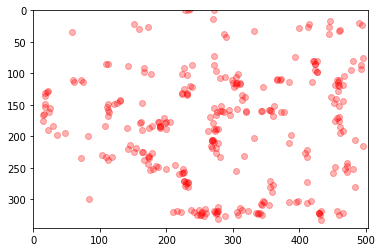

In [130]:
robot.move_forward(150)
#robot.rotate(45)
for particle in stuff:
    particle.move_forward(150)
#    particle.rotate(45)
stuff = MCL(stuff, robot, 300)
plot_particles(stuff)

In [131]:
# To sort the list in place...
stuff.sort(key=lambda x: x.weight, reverse=True)
print(robot.get_coords())
for i in stuff:
    print(i.get_coords(), i.get_weight())

(275, 122, 45)
(116, 305, 335) 0.0016552190733225582
(101, 224, 89) 0.0016552190733225582
(106, 304, 344) 0.0016552190733225582
(322, 338, 348) 0.0016552190733225582
(325, 251, 335) 0.0016552190733225582
(322, 430, 325) 0.0016552190733225582
(20, 489, 221) 0.0016552190733225582
(128, 458, 184) 0.0016552190733225582
(225, 163, 78) 0.0016552190733225582
(159, 342, 225) 0.0016552190733225582
(0, 232, 230) 0.0016552190733225582
(167, 360, 61) 0.0016552190733225582
(124, 226, 71) 0.0016552190733225582
(303, 345, 237) 0.0016552190733225582
(101, 307, 336) 0.0016552190733225582
(177, 162, 98) 0.0016552190733225582
(309, 354, 325) 0.0016552190733225582
(132, 224, 370) 0.0016552190733225582
(-1, 228, 152) 0.0016552190733225582
(120, 459, 167) 0.0016552190733225582
(85, 109, 246) 0.0016552190733225582
(175, 460, 352) 0.0016552190733225582
(271, 226, 336) 0.0016552190733225582
(111, 460, 167) 0.0016552190733225582
(322, 465, 259) 0.0016552190733225582
(220, 143, 86) 0.0016552190733225582
(162, 27

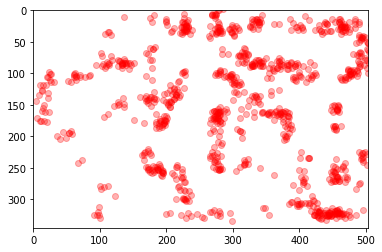

In [114]:
robot.rotate(-50)
robot.move_forward(100)
for particle in stuff:
    particle.rotate(-50)
    particle.move_forward(100)
stuff = MCL(stuff, robot, 1000)
plot_particles(stuff)

In [126]:
# To sort the list in place...
stuff.sort(key=lambda x: x.weight, reverse=True)

for i in stuff:
    print(i.get_coords(), i.get_weight())

(224, 452, 315) 0.00041361691975075446
(294, 263, 318) 0.000320333609964592
(319, 272, 314) 0.00025205648949897056
(231, 453, 316) 0.00025143192002248743
(127, 52, 59) 0.00022138208735415966
(134, 51, 59) 0.0002159907766847277
(296, 278, 304) 0.0001958360728159717
(292, 272, 303) 0.00019520597208489858
(317, 277, 320) 0.00019310398211144604
(112, 148, 230) 0.00019228643765239445
(135, 52, 60) 0.00019075911519971945
(247, 239, 339) 0.00018348126225096046
(239, 242, 337) 0.00018247225346874874
(130, 59, 57) 0.00018001389452059754
(231, 250, 326) 0.0001778123718101003
(83, 445, 256) 0.0001771321388976502
(218, 170, 81) 0.00017316028238700538
(228, 250, 329) 0.00017248051692902595
(213, 172, 58) 0.0001717944839040195
(228, 451, 312) 0.00016917256120557706
(223, 237, 127) 0.0001689683497353011
(220, 424, 322) 0.0001683389923431515
(204, 202, 34) 0.00016806435666034242
(38, 255, 152) 0.00016646759987094993
(206, 201, 33) 0.00016643690125949228
(217, 168, 91) 0.00016631986763726605
(213, 200,

In [132]:
print(robot.get_coords())

(275, 122, 45)


In [ ]:
compar = Particle(125, 280, 0)
new_weight(robot, compar)

In [ ]:
noise = np.random.normal(0,30)
print(noise)